In [1]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings
# 노트북의 워닝이 보이지 않도록 무시하는 처리
import warnings
warnings.filterwarnings('ignore')

question = pd.read_csv('data/schema.csv')
question.shape # shape은 행과 열을 알려줌(R의 dim함수와 같음)

(290, 3)

In [2]:
question.tail() # 끝의 5개 부분을 나타냄

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [3]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져옴
mcq = pd.read_csv('data/multipleChoiceResponses.csv',
                 encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [4]:
# 열 이름을 나열함
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [5]:
# 상위 10개 행을 가져옴
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


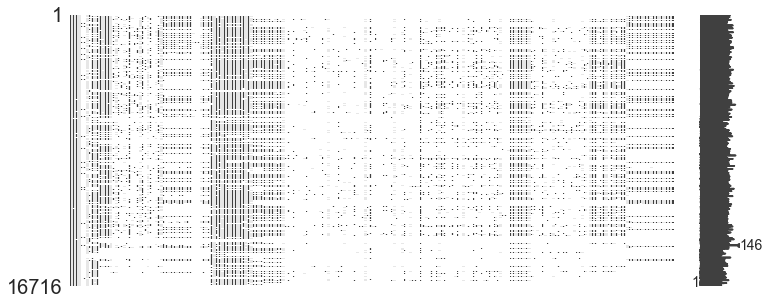

In [6]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다. - 비어있는 데이터 파악하기 좋음
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno

msno.matrix(mcq, figsize=(12,5))

# 설문통계

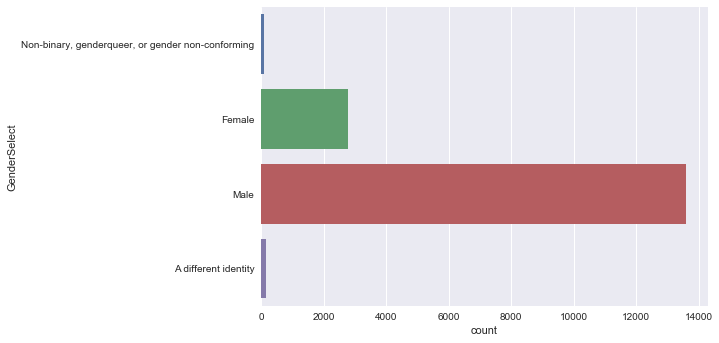

In [7]:
# 성별
# seaborn을 사용해서 그림을 그림
sns.countplot(y='GenderSelect', data=mcq)

In [8]:
# 국가별 응답 수
# value_counts()함수는 sql에서 count로 그룹화된 갯수를 세는 것과 같음
con_df = pd.DataFrame(mcq['Country'].value_counts())
# 'Country' 컬럼을 인덱스로 지정해 줌
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 칼럼 명을 지정해 줌
con_df.columns = ['응답 수', '국가']
con_df
# index 컬럼을 삭제하고 순위를 알기 위해 reset_index()를 사용
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [9]:
# 연령에 대한 정보를 본다.
## pandas.DataFrame.describe()는 결측치를 제외한 기초 통계에 대해 보여준다.(R의 summary와 비슷)
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

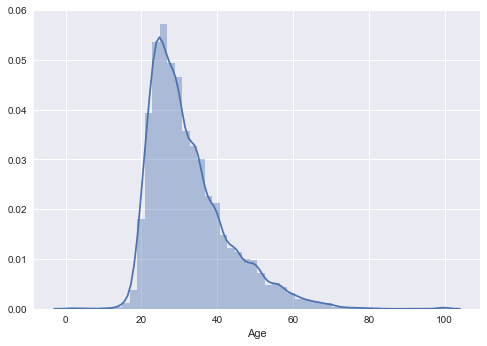

In [10]:
# mcq[mcq['Age']>0] => mcq에 대한 모든 데이터 중 Age필드의 값이 0 이상인 것만 추출
# mcq[mcq['Age']>0]['Age'] => mcq의 Age 필드 중 0 이상인 값들만 추출
sns.distplot(mcq[mcq['Age']>0]['Age'])

# 학력

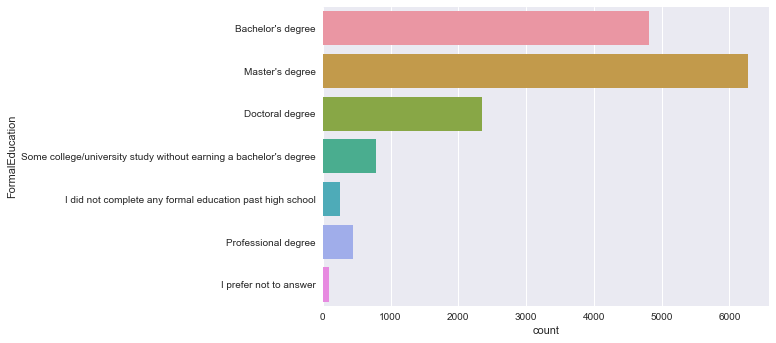

In [11]:
sns.countplot(y='FormalEducation', data=mcq)

# 전공

In [12]:
# value_count를 사용하면 그룹화된 데이터의 카운트 값을 보여준다.
# normalize=True 옵션을 사용하면, 해당 데이터가 전체 데이터에서 어느 정도의 비율을 차지하는지 알 수 있다.
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


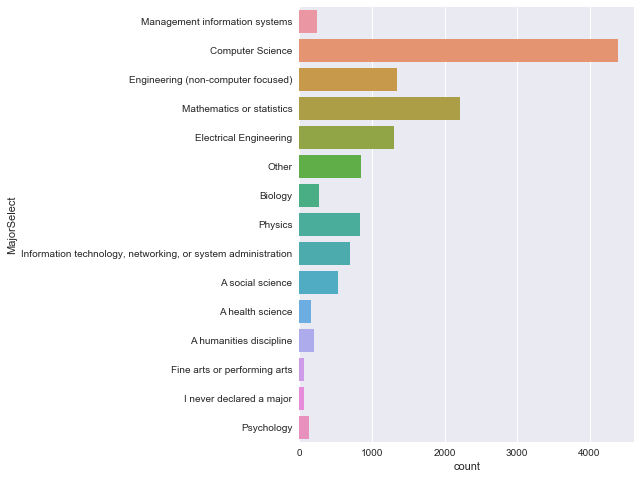

In [13]:
# 재학 중인 사람들의 전공 현황
plt.figure(figsize=(6,8))
sns.countplot(y="MajorSelect", data=mcq)

# 취업 여부

In [14]:
mcq_es_count = pd.DataFrame(
mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(
mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


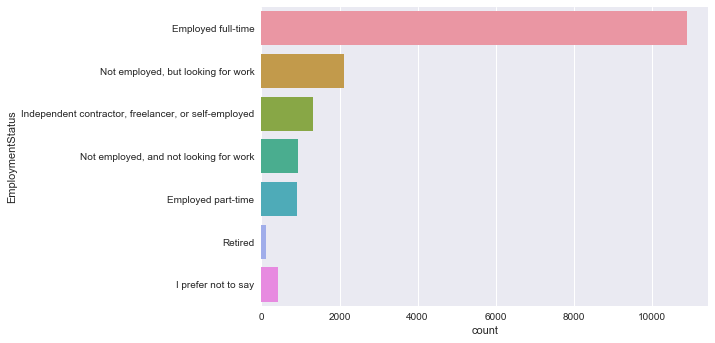

In [15]:
sns.countplot(y="EmploymentStatus", data=mcq)

# 프로그래밍 경험

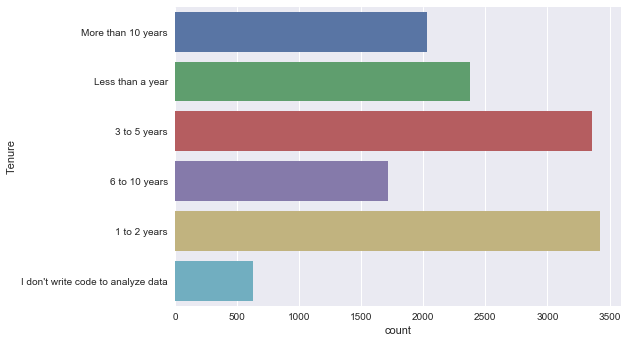

In [16]:
sns.countplot(y="Tenure", data=mcq)

The number of interviewees in Korea: 194


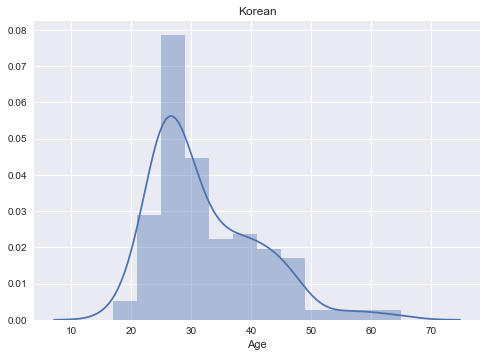

In [20]:
## loc 인덱서를 활용함

korea = mcq.loc[(mcq['Country']=='South Korea')]

print("The number of interviewees in Korea: " + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title("Korean")
plt.show()

In [21]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


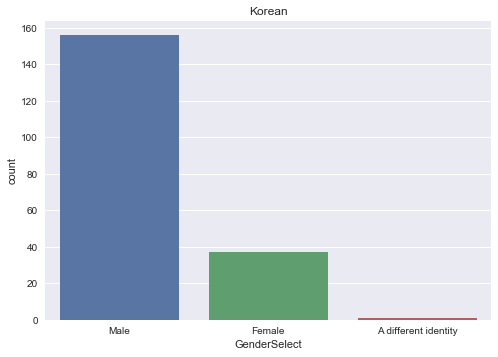

In [22]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

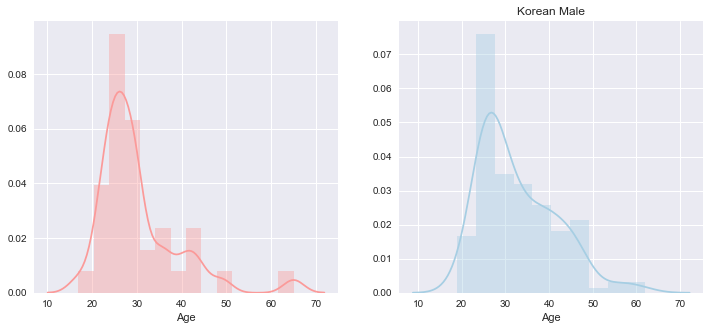

In [25]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title("Korean Female")

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
            norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title("Korean Male")

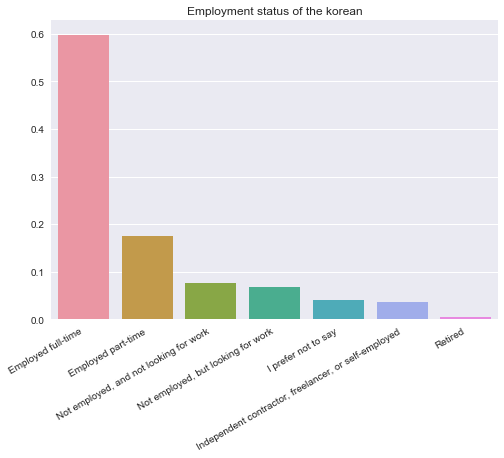

In [27]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

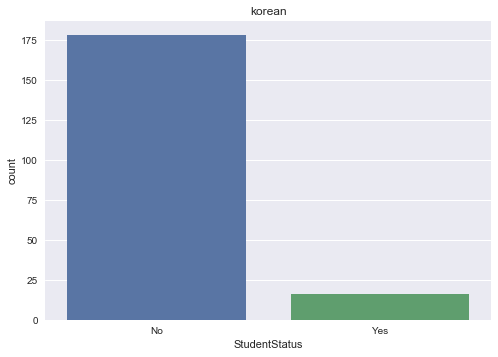

In [28]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [30]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


# 자주 묻는 말 FAQ

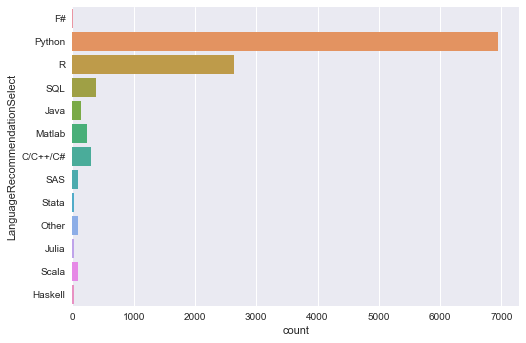

In [31]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

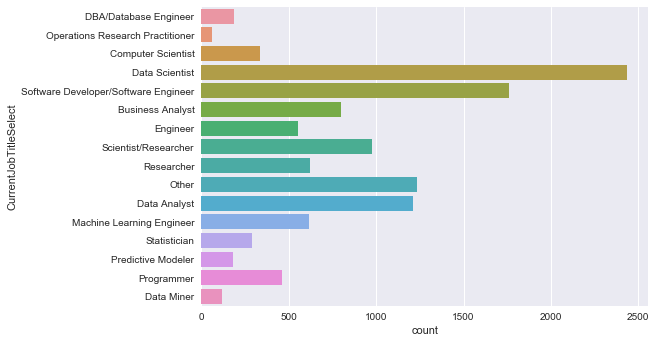

In [32]:
# 현재 하는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [33]:
# 현재 하는 일에 대한 전체 응답 수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


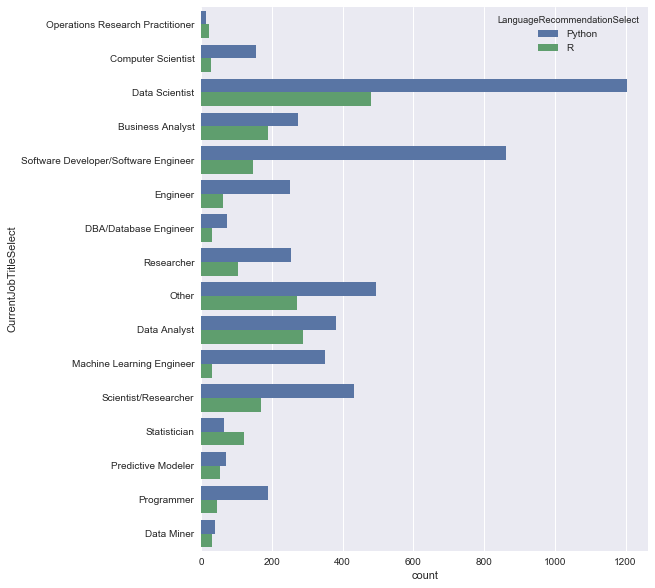

In [35]:
# 현재 하는 일에 대해 응답을 해준 사람 중 Python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
(mcq['LanguageRecommendationSelect'] == 'Python') | (
mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
plt.figure(figsize=(8,10))
# hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있다.
sns.countplot(y="CurrentJobTitleSelect", hue="LanguageRecommendationSelect", data=data)

# 데이터사이언스 툴

In [36]:
mcq_ml_tool_count = pd.DataFrame(
mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(
mcq_ml_tool_percent,
left_index=True,
right_index=True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


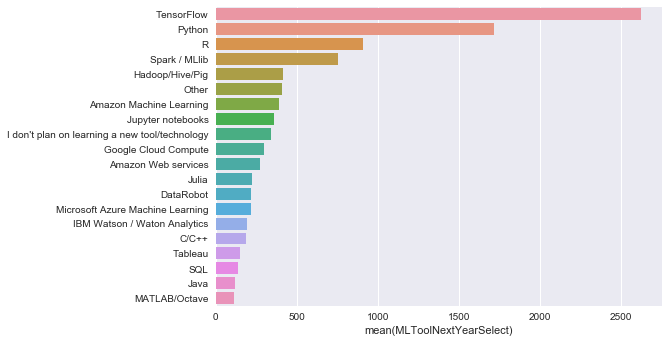

In [37]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

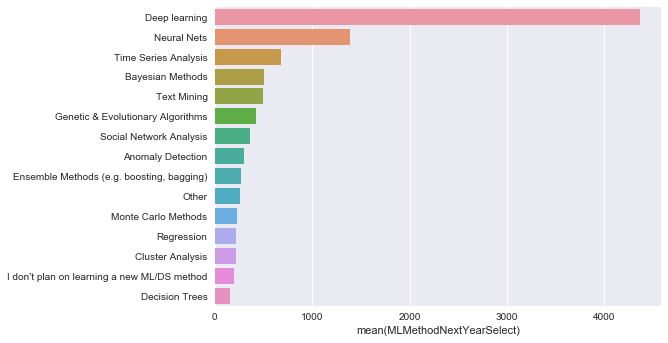

In [41]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [45]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
lambda x: pd.Series(x['LearningPlatformSelect']),
axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

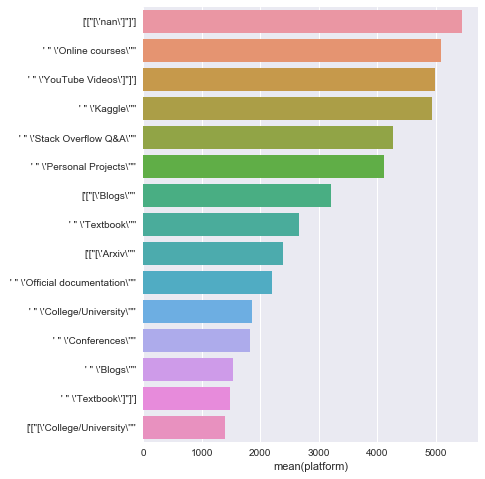

In [46]:
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)